# Your Title Here

**Name(s)**: Raymond Wu

**Website Link**: (your website link)

In [1]:
import pandas as pd
import numpy as np
from pathlib import Path
import os
import matplotlib.pyplot as plt

import plotly.express as px
pd.options.plotting.backend = 'plotly'

from dsc80_utils import * 

## Step 1: Introduction

In [2]:
df = pd.read_csv("2022_LoL_esports_match_data_from_OraclesElixir.csv", dtype={2: 'string'})
df

gameid datacompleteness  \
0       ESPORTSTMNT01_2690210         complete   
1       ESPORTSTMNT01_2690210         complete   
2       ESPORTSTMNT01_2690210         complete   
...                       ...              ...   
150585       9687-9687_game_5          partial   
150586       9687-9687_game_5          partial   
150587       9687-9687_game_5          partial   

                                                url league  ...  deathsat25  \
0                                              <NA>   LCKC  ...         1.0   
1                                              <NA>   LCKC  ...         2.0   
2                                              <NA>   LCKC  ...         0.0   
...                                             ...    ...  ...         ...   
150585  https://lpl.qq.com/es/stats.shtml?bmid=9687   DCup  ...         NaN   
150586  https://lpl.qq.com/es/stats.shtml?bmid=9687   DCup  ...         NaN   
150587  https://lpl.qq.com/es/stats.shtml?bmid=9687   DCup  ...         NaN   

       opp_killsat25  opp_assistsat25 opp_deathsat25  
0                0.0              2.0            0.0  
1                1.0              5.0            1.0  
2                3.0              4.0            3.0  
...              ...              ...            ...  
150585           NaN              NaN            NaN  
150586           NaN              NaN            NaN  
150587           NaN              NaN            NaN  

[150588 rows x 164 columns]

## Step 2: Data Cleaning and Exploratory Data Analysis

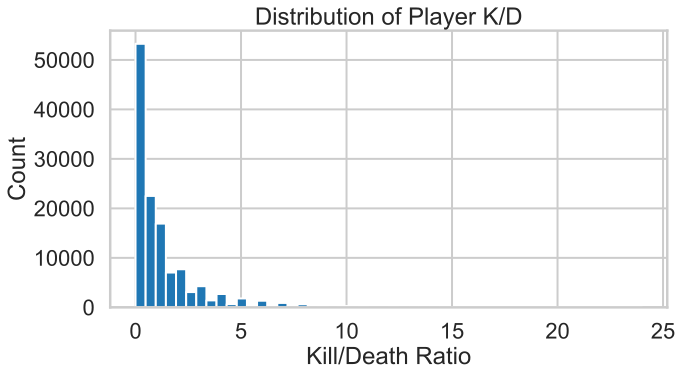

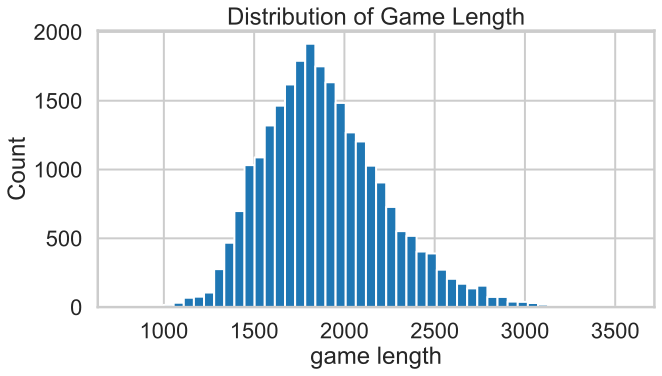

In [3]:
# mixed typing of url already fixed in step 1
df['kd'] = df['kills'] / (df['deaths'] + 1)
df['kd_raw'] = df['kills'] / df['deaths']
team_df   = df[df['position'] == 'team'].copy()
player_df = df[df['position'] != 'team'].copy()

plt.hist(player_df['kd'].dropna(), bins=50)
plt.xlabel('Kill/Death Ratio')
plt.ylabel('Count')
plt.title('Distribution of Player K/D')
plt.show()

plt.hist(team_df['gamelength'].dropna(), bins=50)
plt.xlabel('game length')
plt.ylabel('Count')
plt.title('Distribution of Game Length')
plt.show()

In [4]:
scatter_df = player_df.copy()

plt.figure(figsize=(6, 4))
sample_size = min(20000, len(scatter_df))
sample = scatter_df.sample(n=sample_size, random_state=0)
plt.scatter(sample['kills'], sample['kd'], s=5, alpha=0.3)
plt.xlabel('Kills')
plt.ylabel('KD')
plt.title('Scatterplot of Kills vs KD')
plt.show()

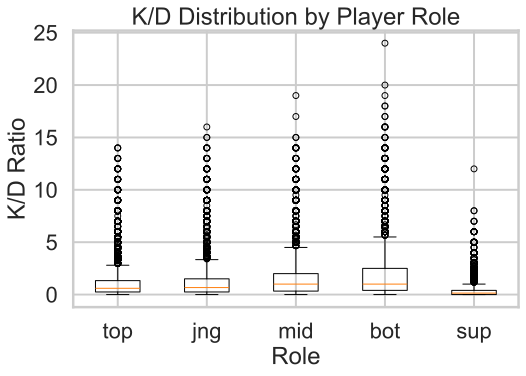

In [5]:
plot_df = player_df.copy()
roles = ['top', 'jng', 'mid', 'bot', 'sup']
data = []
for r in roles:
    s = plot_df.loc[plot_df['position'] == r, 'kd']
    s = s.dropna()
    data.append(s.to_numpy())
    
plt.figure(figsize=(8, 5))
plt.boxplot(
    data,
    tick_labels=roles,
    showfliers=True 
)
plt.xlabel("Role")
plt.ylabel("K/D Ratio")
plt.title("K/D Distribution by Player Role")
plt.show()

In [6]:
stats = player_df.groupby('position').agg({
    'kd': 'mean',
    'kills': 'mean',
    'deaths': 'mean',
    'assists': 'mean',
    'firstblood': 'mean'
})
stats

kd  kills  deaths  assists  firstblood
position                                          
bot       1.85   4.26    2.55     5.37        0.23
jng       1.17   3.06    3.11     6.86        0.35
mid       1.47   3.50    2.66     5.89        0.19
sup       0.31   0.87    3.25     9.19        0.28
top       1.06   2.80    2.95     5.02        0.16

In [7]:
team_stats = team_df.groupby("teamname").agg({
    "result": "mean",
    "teamkills": "mean",
    "teamdeaths": "mean", 
    "pentakills": "sum" 
})
team_stats

result  teamkills  teamdeaths  pentakills
teamname                                                            
100 Thieves                  0.57      12.47       10.88         0.0
100 Thieves Academy          0.58      15.25       13.46         1.0
100 Thieves Next             0.77      19.36       11.58         1.0
...                           ...        ...         ...         ...
seQura ZEST                  0.60      15.47       12.63         0.0
İstanbul Wildcats            0.67      15.84       11.90         2.0
İstanbul Wildcats Academy    0.60      13.60       12.42         2.0

[654 rows x 4 columns]

## Step 3: Assessment of Missingness

In [8]:
# missing_df = (df.isna().mean() * 100).to_frame(name='missing_percent').sort_values('missing_percent', ascending=False)
# pd.set_option('display.max_rows', None)
# pd.set_option('display.max_columns', None)

# missing_df

player_df['split_missing'] = player_df['split'].isna()
# print(player_df['split_missing'].mean())
# def test_col(col):
#     def test_stat(df):
#         overall = df['split_missing'].mean()
#         group_rates = df.groupby(col)['split_missing'].mean()
#         return np.sum(np.abs(group_rates - overall))
#     observed = test_stat(player_df)
#     n_permutations = 1000
#     stats = np.zeros(n_permutations)
#     for i in range(n_permutations):
#         shuffled = np.random.permutation(player_df['split_missing'])
#         df_shuffled = player_df.copy()
#         df_shuffled['split_missing'] = shuffled
#         stats[i] = test_stat(df_shuffled)
#     p_value = np.mean(stats >= observed)
#     print(col, p_value)
# for col in player_df.columns:
#     if col in ['split', 'split_missing']:
#         continue
#     if player_df[col].nunique() < 2:
#         continue
#     if player_df[col].nunique() > 30:
#         continue 
#     test_col(col)

In [9]:
# dependent on patch, not dependent on position whatsoever
# this GENUINELY takes like 30 mins to run because of how large this dataset is so im dropping the data down below
# and commenting out the entire test for missingness so i dont have to wait each time i want to work on this proj
# datacompleteness 0.0
# year 0.0
# playoffs 0.0
# game 0.0
# patch 0.0
# participantid 1.0
# side 1.0
# position 1.0
# result 1.0
# kills 0.018
# deaths 0.011
# doublekills 0.208
# triplekills 0.007
# quadrakills 0.049
# pentakills 0.003
# firstblood 0.0
# firstbloodkill 0.989
# firstbloodassist 0.0
# firstbloodvictim 0.0
# barons 0.02
# opp_barons 0.024
# inhibitors 0.058
# opp_inhibitors 0.041
# killsat10 0.013
# assistsat10 0.002
# deathsat10 0.018
# opp_killsat10 0.017
# opp_assistsat10 0.0
# opp_deathsat10 0.019
# killsat15 0.005
# assistsat15 0.0
# deathsat15 0.23
# ... There was more but the data for those wasn't going to be used anyway

## Step 4: Hypothesis Testing

In [10]:
player_df['kill_prop'] = player_df['kills'] / player_df['teamkills']
roles = ['top', 'jng', 'mid', 'bot', 'sup']
def role_distribution(df):
    means = df.groupby('position')['kill_prop'].mean()
    means = means.reindex(roles)
    return means.values
obs_dist = role_distribution(player_df)
k = len(obs_dist)
uniform = np.full(k, 1 / k)
def tvd(p, q):
    return 0.5 * np.sum(np.abs(p - q))
observed_tvd = float(tvd(obs_dist, uniform))
n_perm = 500
perm_stats = np.zeros(n_perm)
for i in range(n_perm):
    shuffled = player_df.copy()
    shuffled['position'] = np.random.permutation(shuffled['position'])
    dist_perm = role_distribution(shuffled)
    perm_stats[i] = tvd(dist_perm, uniform)
p_value = float(np.mean(perm_stats >= observed_tvd))
observed_tvd, p_value

(0.14361442999398638, 0.0)

## Step 5: Framing a Prediction Problem

In [11]:
# Predict a role someone played based on their post-game data

## Step 6: Baseline Model

In [12]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report
features = ['kills', 'deaths']
target = 'position'

df = player_df.dropna(subset=features + [target])

X = df[features]
y = df[target]

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

numeric_preprocess = Pipeline(steps=[
    ('scaler', StandardScaler())
])

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_preprocess, features)
    ]
)

baseline_model = Pipeline(steps=[
    ('preprocess', preprocessor),
    ('clf', LogisticRegression(max_iter=1000))
])

baseline_model.fit(X_train, y_train)

y_pred = baseline_model.predict(X_test)

print("Baseline Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

Baseline Accuracy: 0.334568491513268
              precision    recall  f1-score   support

         bot       0.33      0.47      0.39      5020
         jng       0.27      0.23      0.25      5019
         mid       0.26      0.10      0.14      5020
         sup       0.40      0.77      0.53      5020
         top       0.23      0.10      0.14      5019

    accuracy                           0.33     25098
   macro avg       0.30      0.33      0.29     25098
weighted avg       0.30      0.33      0.29     25098



## Step 7: Final Model

In [21]:
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, classification_report
from sklearn.base import BaseEstimator, TransformerMixin

features_final = ['kills', 'deaths', 'assists', 'teamkills']
target = 'position'

df_final = player_df.dropna(subset=features_final + [target])

X_full = df_final[features_final]
y_full = df_final[target]

train_idx = X_train.index
test_idx = X_test.index

X_train_final = X_full.loc[train_idx]
X_test_final = X_full.loc[test_idx]
y_train_final = y_full.loc[train_idx]
y_test_final = y_full.loc[test_idx]

class FeatureEngineer(BaseEstimator, TransformerMixin):
    def fit(self, X, y=None):
        return self
    
    def transform(self, X):
        # X is a DataFrame with kills, deaths, assists, teamkills
        X = X.copy()
        deaths_safe = X['deaths'].replace(0, 1)
        teamkills_safe = X['teamkills'].replace(0, 1)
        
        X['kda'] = (X['kills'] + X['assists']) / deaths_safe
        X['kp'] = (X['kills'] + X['assists']) / teamkills_safe
        
        return X

features_final = ['kills', 'deaths', 'assists', 'teamkills', 'kda', 'kp']

numeric_preprocess = Pipeline(steps=[
    ('scaler', StandardScaler())
])

preprocessor_final = ColumnTransformer(
    transformers=[
        ('num', numeric_preprocess, features_final)
    ]
)

rf = RandomForestClassifier(random_state=42)

final_pipeline = Pipeline(steps=[
    ('feat_eng', FeatureEngineer()),
    ('preprocess', preprocessor_final),
    ('clf', rf)
])

# max_depth: controls how deep each decision tree can grow. Shallow trees may underfit, while very deep trees can overfit. I searched over [None, 10, 20].

# n_estimators: the number of trees in the forest. More trees generally improve stability and performance but are more expensive. I searched over [100, 200].

# min_samples_leaf: the minimum number of samples required at a leaf node. Larger values regularize the model and reduce overfitting. I searched over [1, 3, 5].

param_grid = {
    'clf__n_estimators': [100, 200],
    'clf__max_depth': [None, 10, 20],
    'clf__min_samples_leaf': [1, 3, 5]
}

grid_search = GridSearchCV(
    final_pipeline,
    param_grid,
    cv=3,
    n_jobs=2,
    verbose=1
)

grid_search.fit(X_train_final, y_train_final)

print("Best params:", grid_search.best_params_)

best_model = grid_search.best_estimator_

y_pred_final = best_model.predict(X_test_final)

print("Final model accuracy:", accuracy_score(y_test_final, y_pred_final))
print(classification_report(y_test_final, y_pred_final))


Fitting 3 folds for each of 18 candidates, totalling 54 fits


/Users/raymondwu/miniforge3/envs/dsc80/lib/python3.12/site-packages/joblib/externals/loky/process_executor.py:782: UserWarning:

A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.



Best params: {'clf__max_depth': 10, 'clf__min_samples_leaf': 5, 'clf__n_estimators': 100}
Final model accuracy: 0.4093951709299546
              precision    recall  f1-score   support

         bot       0.38      0.43      0.40      5020
         jng       0.33      0.34      0.33      5019
         mid       0.28      0.11      0.15      5020
         sup       0.55      0.73      0.63      5020
         top       0.39      0.45      0.42      5019

    accuracy                           0.41     25098
   macro avg       0.39      0.41      0.39     25098
weighted avg       0.39      0.41      0.39     25098



## Step 8: Fairness Analysis

In [ ]:
import numpy as np
import pandas as pd
from sklearn.metrics import recall_score

y_true = y_test_final
y_pred = y_pred_final

n_permutations = 1000
stats = np.zeros(n_permutations)

mask = y_true.isin(['mid', 'sup'])
y_true_sub = y_true[mask]
y_pred_sub = y_pred[mask]

rec_mid_obs = recall_score(y_true_sub, y_pred_sub, labels=['mid'], average='macro')
rec_sup_obs = recall_score(y_true_sub, y_pred_sub, labels=['sup'], average='macro')
observed_diff = rec_mid_obs - rec_sup_obs

for i in range(n_permutations):
    shuffled = np.random.permutation(y_true_sub)
    
    rec_mid_perm = recall_score(shuffled, y_pred_sub, labels=['mid'], average='macro')
    rec_sup_perm = recall_score(shuffled, y_pred_sub, labels=['sup'], average='macro')
    
    stats[i] = rec_mid_perm - rec_sup_perm

p_value = np.mean(stats <= observed_diff)
print("Observed diff:", observed_diff)
print("p-value:", p_value)